In [35]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import datetime
import sklearn.preprocessing
import matplotlib.cm as cm

In [4]:
_ANDREA = False
if _ANDREA:
    BASE_FOLDER = Path("C:/Users/resca/OneDrive - Politecnico di Milano/_Dottorato/6 - Tesisti/2021_2022_Tasso/_Data")
else:
    BASE_FOLDER = Path("E:\My Drive\_Papers\_2023_Chemosensors\_Data")

In [5]:
compounds = ['BUT', 'CH4', 'CO2']
concentrations = ['75', '131', '130', '303']
sensor_labels = ['S-1', 'S-2', 'S-3','S-4', 'S-5', 'S-6', 'S-7', 'S-8']

In [43]:
df = pd.DataFrame(columns=['Compound', 'Concentration', 'Temperature', 'Humidity', 'Pressure', 'Stage', 'Temperature Modulation'])
for compound in compounds:
    for conc in concentrations:
        folder = BASE_FOLDER / f'{compound}_{conc}ppm'
        if folder.exists():
            print(f'{compound}-{conc}')
            for csv_file in sorted(folder.iterdir()):
                if csv_file.is_file() and 'csv' in csv_file.name:
                    # Get temperature modulation from file name
                    temperature_m = csv_file.name.split('_')[-1][:-4]
                    # Get start date and time 20230606_100558
                    start_date = csv_file.name[:15]
                    start_date_dt = datetime.datetime.strptime(start_date, "%Y%m%d_%H%M%S")

                    tmp_data = pd.read_csv(csv_file, header=6)
                    tmp_data['Concentration'] = conc
                    tmp_data['Compound'] = compound
                    tmp_data = tmp_data.drop(['Packet_ID', 'S-1','S-2','S-3','S-4','S-5','S-6','S-7','S-8'], axis=1)
                    tmp_data['Time'] = [start_date_dt+datetime.timedelta(seconds=x*0.1) for x in range(len(tmp_data))]
                    df = pd.concat([df, tmp_data], ignore_index=True)
                   

BUT-75
BUT-131
BUT-303
CH4-75
CH4-130
CH4-303
CO2-75
CO2-130
CO2-303


In [54]:
df['Stage-Encoded'] = "r"
df.loc[df['Stage']=='Measurement', 'Stage-Encoded'] = "b"
df.loc[df['Stage']=='Recovery', 'Stage-Encoded'] = "g"


In [101]:
df['HH-MM'] = pd.to_datetime(df['Time']).dt.time

In [102]:
df.head()

,Compound,Concentration,Temperature,Humidity,Pressure,Stage,Temperature Modulation,Time,Stage-Encoded,HH-MM
0,BUT,75,21.94,32.092,1003.46,Cleaning,5V,2023-06-06 10:05:58.000,r,10:05:58
1,BUT,75,21.94,32.092,1003.46,Cleaning,5V,2023-06-06 10:05:58.100,r,10:05:58.100000
2,BUT,75,21.94,32.092,1003.46,Cleaning,5V,2023-06-06 10:05:58.200,r,10:05:58.200000
3,BUT,75,21.94,32.092,1003.46,Cleaning,5V,2023-06-06 10:05:58.300,r,10:05:58.300000
4,BUT,75,21.94,32.092,1003.46,Cleaning,5V,2023-06-06 10:05:58.400,r,10:05:58.400000


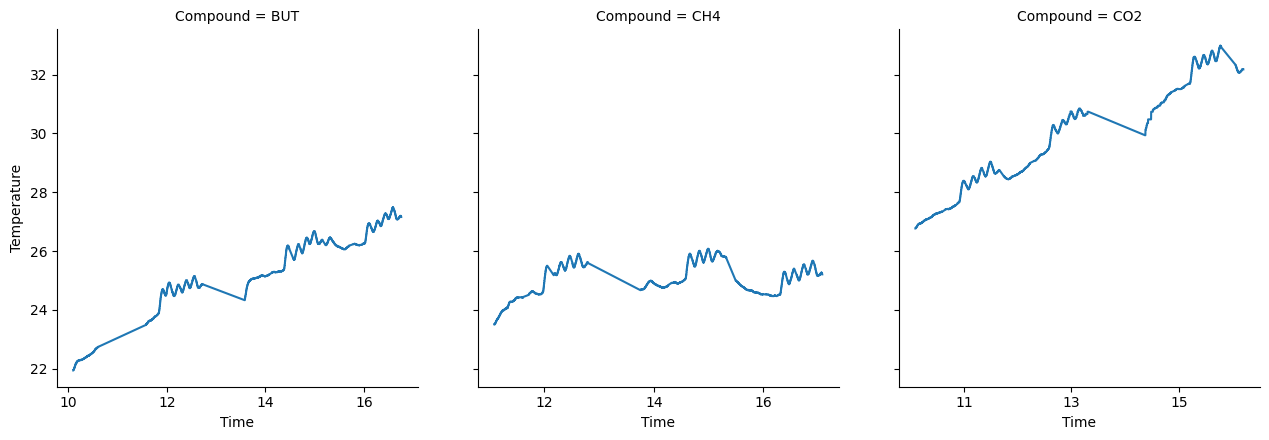

In [106]:
import seaborn as sns
import matplotlib.dates as mdates

hours = mdates.HourLocator(interval = 1)
h_fmt = mdates.DateFormatter('%H')

g = sns.FacetGrid(data=df, col='Compound', sharex=False, height=4.5, aspect=.95)
g.map(sns.lineplot, 'Time', 'Temperature')
for ax in g.axes.flat:
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
    # set formatter
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))

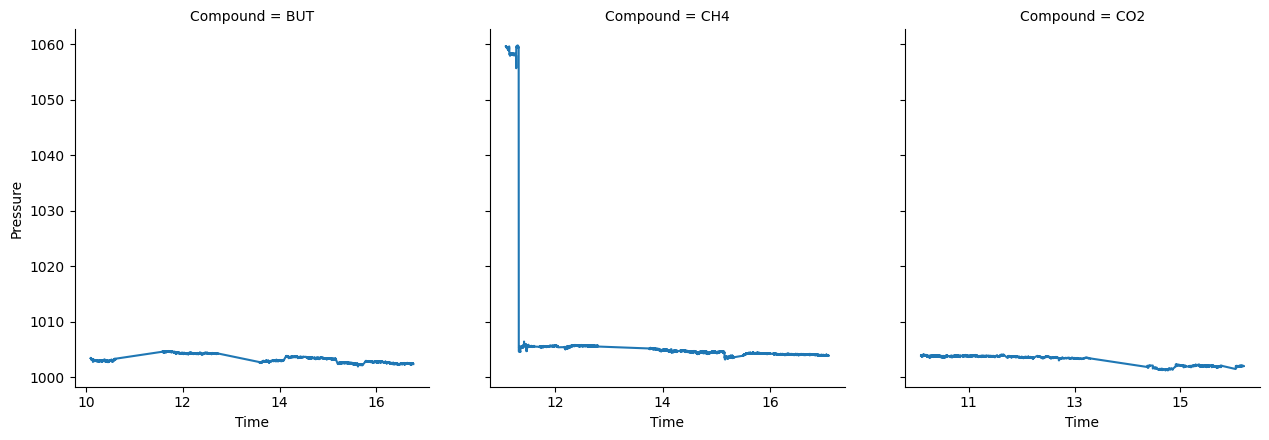

In [108]:
g = sns.FacetGrid(data=df, col='Compound', sharex=False, height=4.5, aspect=.95)
g.map(sns.lineplot, 'Time', 'Pressure')
for ax in g.axes.flat:
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
    # set formatter
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))